In [10]:
#Aim: To apply Locally Weighted Regression (LWR) on a dataset, 
#     using a radial kernel, and analyze the effect of 
#     different bandwidth values (tau) on the fitted curve.
#Name: Binish Moosa
#UIN: 232P001 Rollno: 24
#COMPs A

import numpy as np
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot

def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))
def local_regression(x0, X, Y, tau):
    x0 = np.r_[1, x0]
    X_ = np.c_[np.ones(len(X)), X]

    xw = X_.T * radial_kernel(x0, X_, tau)
    beta = np.linalg.pinv(xw @ X_) @ xw @ Y

    return x0 @ beta
n = 1000
X = np.linspace(-3, 3, num=n)
print("The Data Set X (By Binish Moosa 24):\n", X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + 0.5)
print("")
print("The Fitting Curve Data Set Y (By Binish Moosa 24):\n", Y[1:10])
X += np.random.normal(scale=0.1, size=n)
print("")

print("Normalized X (By Binish Moosa 24):\n", X[1:10])
domain = np.linspace(-3, 3, num=300)

print("Xo Domain Space (By Binish Moosa 24) :\n", domain[1:10])
def plot_lwr(tau):
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plot = figure(width=400, height=400)
    plot.title.text = f'tau={tau}'
    plot.scatter(X, Y, alpha=0.3)
    plot.line(domain, prediction, line_width=2, color='red')
    return plot

show(gridplot([
    [plot_lwr(10.0), plot_lwr(1.0)],
    [plot_lwr(0.1), plot_lwr(0.01)]
]))


The Data Set X (By Binish Moosa 24):
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]

The Fitting Curve Data Set Y (By Binish Moosa 24):
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]

Normalized X (By Binish Moosa 24):
 [-3.06540734 -3.08963884 -3.00426628 -2.90755663 -2.93522002 -2.88549291
 -2.8899409  -3.02413507 -2.9346192 ]
Xo Domain Space (By Binish Moosa 24) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


C:\Users\binish\AppData\Local\Temp\ipykernel_18964\1384545248.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i, i] = np.exp(- (diff @ diff.T) / (2 * tau ** 2))


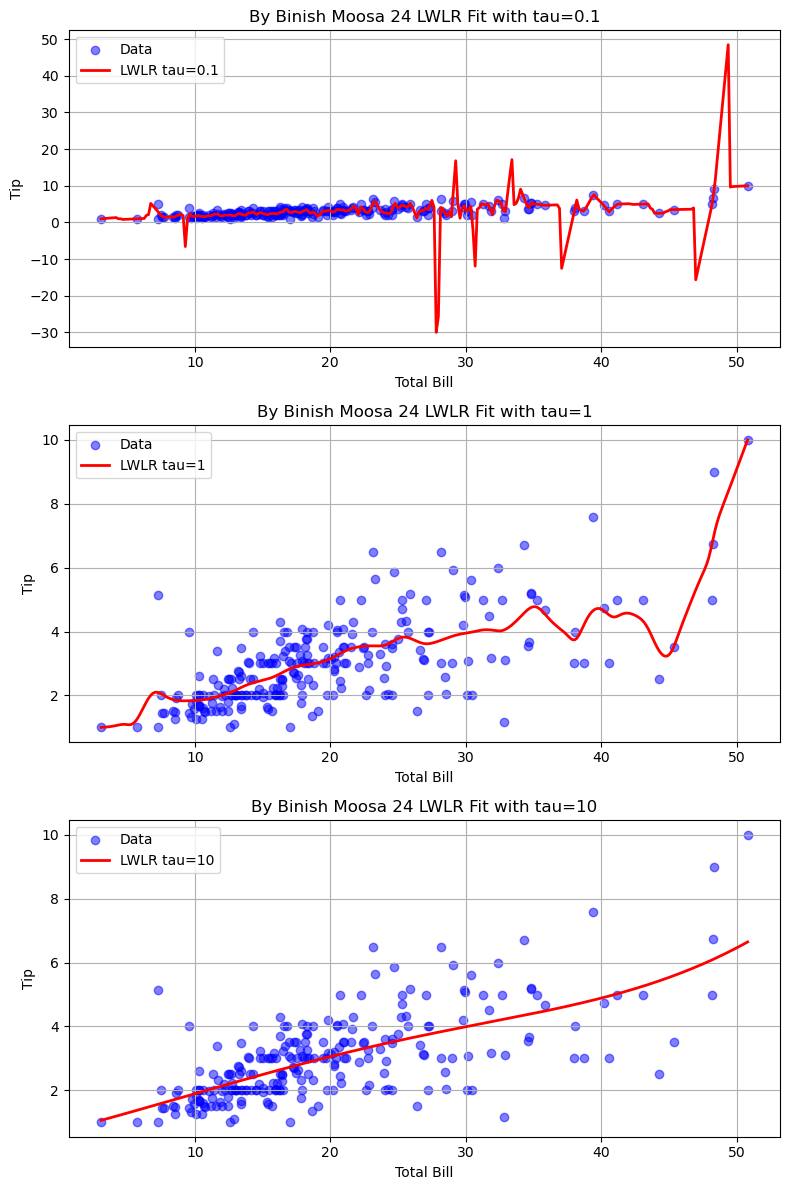

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("tips.csv")
X_data = np.array(data.total_bill).reshape(-1, 1)
Y_data = np.array(data.tip).reshape(-1, 1)
X = np.hstack((np.ones_like(X_data), X_data))
Y = Y_data
def gaussian_kernel(x0, X, tau):
    m = X.shape[0]
    W = np.eye(m)
    for i in range(m):
        diff = x0 - X[i]
        W[i, i] = np.exp(- (diff @ diff.T) / (2 * tau ** 2))
    return W
def lwlr_predict(x0, X, Y, tau):
    W = gaussian_kernel(x0, X, tau)
    theta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ Y)
    return x0 @ theta
def lwlr_fit_domain(X, Y, tau, x_domain):
    y_pred = []
    for x0 in x_domain:
        x0_bias = np.array([1, x0]).reshape(1, 2)
        y_pred.append(lwlr_predict(x0_bias, X, Y, tau)[0, 0])
    return np.array(y_pred)

x_min, x_max = X_data.min(), X_data.max()
x_domain = np.linspace(x_min, x_max, 300)
taus = [0.1, 1, 10]
plt.figure(figsize=(8, 12))

for i, tau in enumerate(taus):
    plt.subplot(len(taus), 1, i+1)
    y_pred_domain = lwlr_fit_domain(X, Y, tau, x_domain)
    plt.scatter(X_data, Y, color='blue', alpha=0.5, label='Data')
    plt.plot(x_domain, y_pred_domain, color='red', linewidth=2, label=f'LWLR tau={tau}')
    plt.xlabel('Total Bill')
    plt.ylabel('Tip')
    plt.title(f'By Binish Moosa 24 LWLR Fit with tau={tau}')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()